In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import numpy as np

def histogram(frequency_table, rel_frequency=False, density=False, xlabel_rotation=0, xlabel=None, ylabel=None, title=None, on_bin_txt_space=0.05, mean=False, median=False, mode=False, fine_mode=False):
    """
    Plots a histogram from a frequency table with options for relative frequency, density, and custom labels.
    Mean, Median, and Mode are calculated and plotted only if their respective flags are set to True.
    
    Parameters
    ----------
    frequency_table : dict
        A dictionary with two keys:
        - "Absolute Häufigkeit": List of absolute frequencies for each class.
        - "Klassen": List of class intervals in string format (e.g., "[0; 1)", "[1; 2)").
        
    rel_frequency : bool, optional
        If True, plots relative frequencies instead of absolute frequencies. Default is False.
        
    density : bool, optional
        If True, calculates and plots frequency density. If `rel_frequency` is also True, plots the relative frequency density. 
        Otherwise, plots the absolute frequency density. Default is False.
        
    xlabel_rotation : int or float, optional
        Rotation angle for x-axis labels. Default is 0.
        
    xlabel : str, optional
        Label for the x-axis. If None, defaults to "Klassen".
        
    ylabel : str, optional
        Label for the y-axis. If None, the label is automatically set based on the settings for `density` and `rel_frequency`.
        
    title : str, optional
        Title of the plot. If None, defaults to "Histogramm".
        
    on_bin_txt_space : float, optional
        Vertical space between the top of each bar and the label text above it. Default is 0.05.

    mean : bool, optional
        If True, calculates and draws a vertical line for the arithmetic mean. Default is False.
        
    median : bool, optional
        If True, calculates and draws a vertical line for the median. Default is False.

    mode : bool, optional
        If True, calculates and draws a vertical line for the mode using Grobberechnung. Default is False.

    fine_mode : bool, optional
        If True, calculates the mode using Feinberechnung (requires mode=True). Default is False.
        
    Returns
    -------
    None
        The function creates and displays a histogram plot.
    """

    fig, axes = plt.subplots(figsize=(10, 6))
    sns.set_palette("crest")
    
    absolute_frequencies = frequency_table["Absolute Häufigkeit"]
    sum_absolute_frequencies = sum(absolute_frequencies)
    relative_frequencies = [freq / sum_absolute_frequencies for freq in absolute_frequencies]
    classes = frequency_table["Klassen"]

    class_widths = []
    class_centers = []
    class_edges = []
    
    for bin in classes:
        bin_start, bin_end = map(float, bin.strip("[]()").split(";"))
        bin_width = bin_end - bin_start
        bin_center = (bin_start + bin_end) / 2
        
        class_widths.append(bin_width)
        class_centers.append(bin_center)
        class_edges.append(bin_start)
    class_edges.append(bin_end)

    # Berechne das arithmetische Mittel, falls mean=True
    if mean:
        mean_value = sum(abs_freq * center for abs_freq, center in zip(absolute_frequencies, class_centers)) / sum_absolute_frequencies

    # Berechne den Median (Grobberechnung), falls median=True
    if median:
        cumulative_freq = np.cumsum(absolute_frequencies)
        total = sum_absolute_frequencies
        median_class_index = np.searchsorted(cumulative_freq, total / 2)
        
        # Grobberechnung für den Median
        lower_edge = class_edges[median_class_index]
        upper_edge = class_edges[median_class_index + 1]
        median_value = lower_edge + (upper_edge - lower_edge) / 2

    # Berechne den Modalwert, falls mode=True
    if mode:
        modal_class_index = np.argmax(absolute_frequencies)  # Klasse mit der höchsten Häufigkeit
        modal_lower_edge = class_edges[modal_class_index]
        modal_upper_edge = class_edges[modal_class_index + 1]
        modal_class_width = modal_upper_edge - modal_lower_edge
        modal_center = class_centers[modal_class_index]
        
        # Grobberechnung
        mode_value = modal_lower_edge + modal_class_width / 2
        
        # Feinberechnung, falls fine_mode=True
        if fine_mode:
            modal_freq = absolute_frequencies[modal_class_index]
            modal_freq_prev = absolute_frequencies[modal_class_index - 1] if modal_class_index > 0 else 0
            modal_freq_next = absolute_frequencies[modal_class_index + 1] if modal_class_index < len(absolute_frequencies) - 1 else 0
            mode_value = modal_lower_edge + (
                (modal_freq - modal_freq_prev) / 
                ((2 * modal_freq) - modal_freq_prev - modal_freq_next)
            ) * modal_class_width

    # Bestimme die Höhen basierend auf density und rel_frequency
    if density:
        # Häufigkeitsdichte berechnen
        if rel_frequency:
            heights = [(rel_freq / width) for rel_freq, width in zip(relative_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Relative Häufigkeitsdichte"
        else:
            heights = [abs_freq / width for abs_freq, width in zip(absolute_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Absolute Häufigkeitsdichte"
    else:
        # Normale Häufigkeiten (absolute oder relative)
        heights = relative_frequencies if rel_frequency else absolute_frequencies
        ylabel = ylabel if ylabel else ("Relative Häufigkeit (%)" if rel_frequency else "Absolute Häufigkeit")
        if rel_frequency:
            axes.yaxis.set_major_formatter(PercentFormatter(1))

    # Erstelle das Histogramm
    bars = axes.bar(
        x=class_centers,
        height=heights,
        width=class_widths,
        edgecolor="black"
    )
    
    # Anpassungen am Plot
    axes.set_xticks(class_edges)
    axes.set_xticklabels(class_edges, rotation=xlabel_rotation)
    axes.grid(True, linestyle="--", alpha=0.7, axis="y")
    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel if xlabel else "Klassen")
    axes.set_title(title if title else "Histogramm")  
    sns.despine()
    plt.tight_layout()

    # Zeichne vertikale Linien für Mittelwert, Median und Modalwert
    if mean:
        axes.axvline(mean_value, color='#BF2EF0', linestyle='--', linewidth=1.5, label=f'Arithmetisches Mittel = {mean_value:.2f}')
    if median:
        axes.axvline(median_value, color='#E85C0D', linestyle='--', linewidth=1.5, label=f'Median = {median_value:.2f}')
    if mode:
        axes.axvline(mode_value, color='#26355D', linestyle='--', linewidth=1.5, label=f'Modalwert = {mode_value:.2f} {"(Feinberechnung)" if fine_mode else "(Grobberechnung)"}')

    if mean or median or mode:
        axes.legend()


## 1. Beispiel

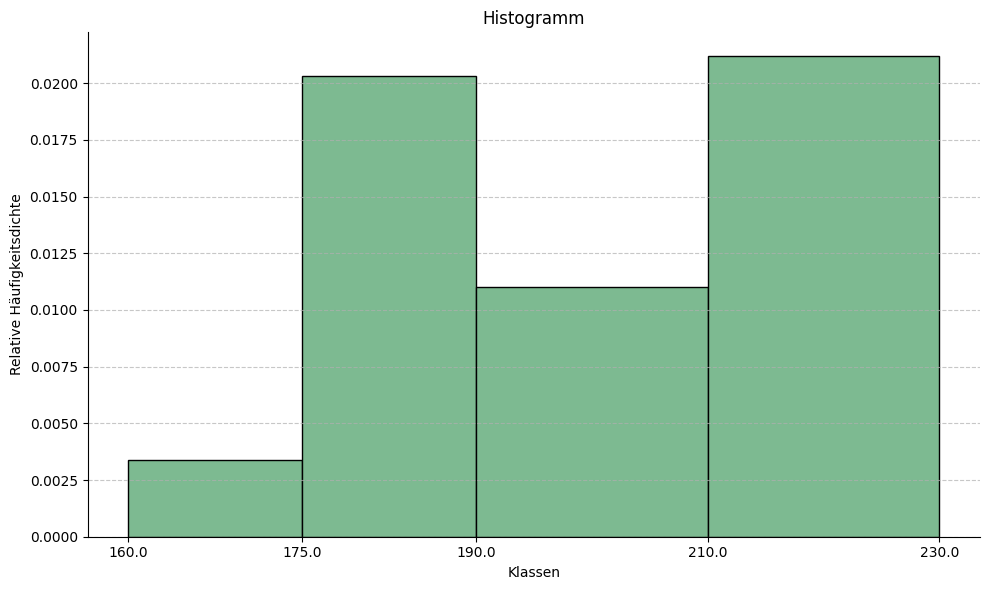

In [6]:
# Beispiel für die Verwendung
frequency_table = {
    "Absolute Häufigkeit": [3, 18, 13, 25],
    "Klassen": ["[160; 175)", "[175; 190)", "[190; 210)", "[210; 230)"]
}

# Aufruf der Funktion, um relative Häufigkeitsdichte darzustellen
histogram(frequency_table=frequency_table, rel_frequency=True, density=True, on_bin_txt_space=0.0001)

## 2. Beispiel

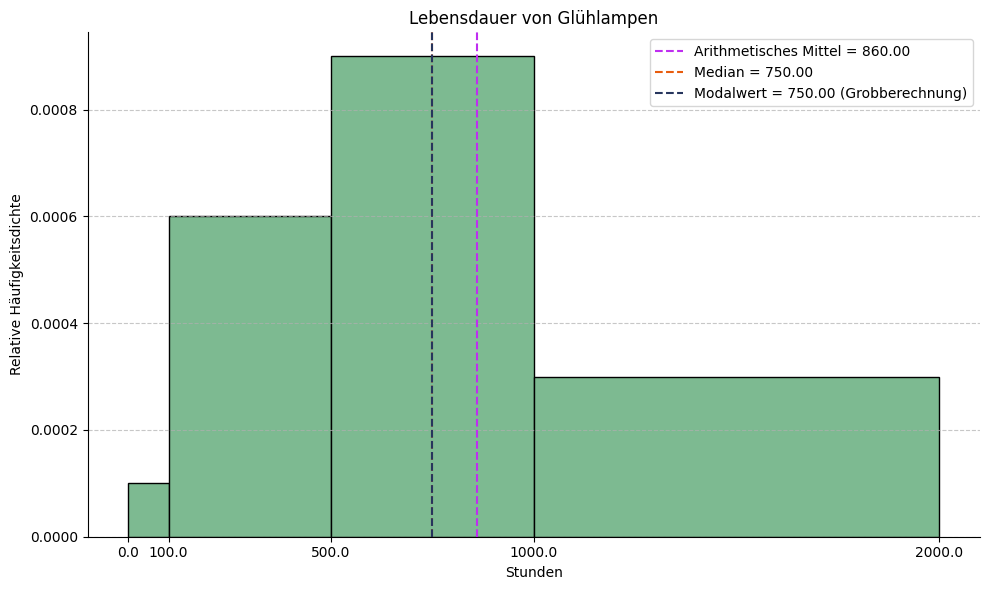

In [7]:
# Beispiel für die Verwendung
frequency_table = {
    "Absolute Häufigkeit": [1, 24, 45, 30],
    "Klassen": ["[0; 100)", "[100; 500)", "[500; 1000)", "[1000; 2000)"]
}
#class_bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
# Aufruf der Funktion, um relative Häufigkeitsdichte darzustellen
histogram(frequency_table=frequency_table, rel_frequency=True, density=True, on_bin_txt_space=0.00001, xlabel="Stunden", title="Lebensdauer von Glühlampen", mean=True, median=True, mode=True)

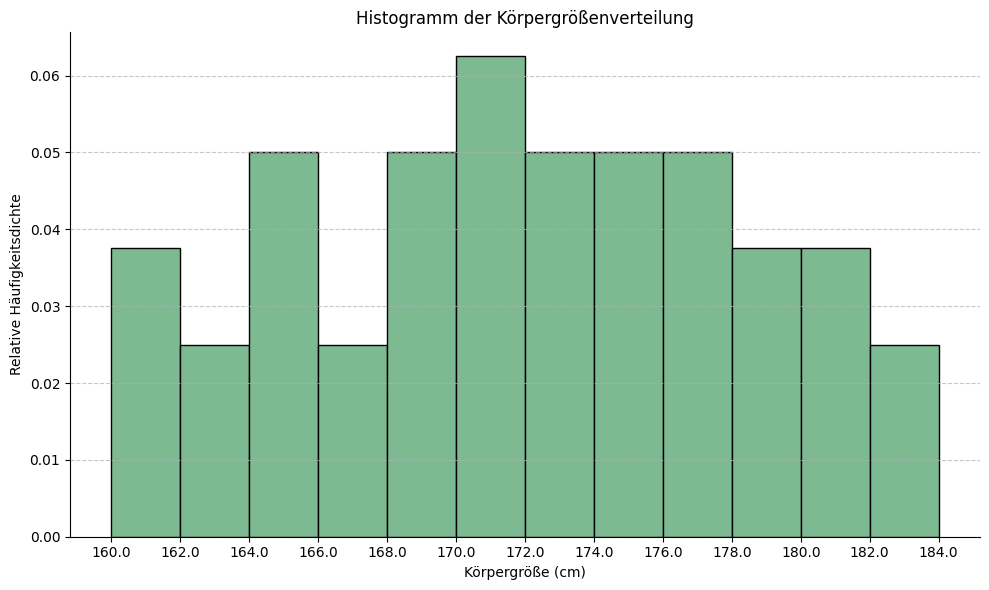

In [8]:
# Beispiel für die Verwendung
frequency_table = {
    "Absolute Häufigkeit": [3, 2, 4, 2, 4, 5, 4, 4, 4, 3, 3, 2],
    "Klassen": ["[160; 162)", "[162; 164)", "[164; 166)", "[166; 168)", "[168; 170)", "[170; 172)", "[172; 174)", "[174; 176)", "[176; 178)", "[178; 180)", "[180; 182)", "[182; 184)"]
}

# Aufruf der Funktion, um relative Häufigkeitsdichte darzustellen
histogram(frequency_table=frequency_table, rel_frequency=True, density=True, on_bin_txt_space=0.0001, xlabel="Körpergröße (cm)", title="Histogramm der Körpergrößenverteilung")